In [1]:
# Import the libraries
import tweepy                                 #An easy-to-use Python library for accessing the Twitter API.
from textblob import TextBlob                 #TextBlob is a Python (2 and 3) library for processing textual data. 
                                              #It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Twitter Api Credentials
consumerKey = 'dafJg8Hqgh4desUtcHmeX5ZvL'
consumerSecret = '0P7AV8uZIdpBmN6XdeeJtz2i3n2bwiAI5Hyx8CCS5HW7ZSfzmi'
accessToken = '1368206717457068035-kZufQ96RxtKQsEZLCD06DBw6nhFQzQ'
accessTokenSecret = '4JkHpc1y2dLA1fDeaNgMlEREigW6EsIXLByCxLoQT3awP'

In [3]:
try:
    # Create the authentication object 
    authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 

    # Set the access token and access token secret
    authenticate.set_access_token(accessToken, accessTokenSecret) 

    # Creating the API object while passing in auth information
    api = tweepy.API(authenticate, wait_on_rate_limit = True) 
except:
    print("Invalid Credentials")

In [4]:
print("Enter the twitter handle of the user whose tweets you want to analyse : ")
string = input()

Enter the twitter handle of the user whose tweets you want to analyse : 
BillGates


In [5]:
try:
    # Extract 100 tweets from the twitter user
    posts = api.user_timeline(screen_name=string, count = 200, lang ="en", tweet_mode="extended")

    #  Print the last 50 tweets
    print("Showing the 100 recent tweets of the user ("+string + ") : \n")
    i=1
    for tweet in posts[:100]:
        print(str(i) +') '+ tweet.full_text + '\n')
        i= i+1
except:
    print("Invalid Twitter Handle")

Showing the 100 recent tweets of the user (BillGates) : 

1) The journalist @ElizKolbert has created a fascinating beat for herself covering humanity’s impact on nature and our attempts to control it. Her latest book is a good reminder that we need to watch out for the unforeseen effects of our actions. https://t.co/8gt4I8oxXc

2) The persistence of countless Rotarians gives me hope that we can achieve a polio-free world. As they close the #Rotary21 Convention, I'd like to thank @Rotary for the continued partnership to #endpolio. https://t.co/sZ4dRiuiXk

3) I'm almost always interested in books about American presidents, and I especially loved A Promised Land. It’s a fascinating look at what it’s like to steer a country through challenging times. https://t.co/RgpXbkOnDw

4) This book gave me a deeper, more nuanced appreciation for the system that is at the core of humanity’s fight against COVID-19 and everything our foundation’s Global Health program is trying to do. https://t.co/uTUH1

In [6]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,The journalist @ElizKolbert has created a fasc...
1,The persistence of countless Rotarians gives m...
2,I'm almost always interested in books about Am...
3,"This book gave me a deeper, more nuanced appre..."
4,If you’re looking for a good book to read this...


In [7]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text

# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df.head()

,Tweets
0,The journalist has created a fascinating beat...
1,The persistence of countless Rotarians gives m...
2,I'm almost always interested in books about Am...
3,"This book gave me a deeper, more nuanced appre..."
4,If you’re looking for a good book to read this...


In [11]:
# Removing emojis from tweets as they do not participate in sentiment analysis
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

# Calling function in order to get emojis removed
df['Tweets'] = df['Tweets'].apply(remove_emoji)

# Displaying the new data frame
df

,Tweets
0,The journalist has created a fascinating beat...
1,The persistence of countless Rotarians gives m...
2,I'm almost always interested in books about Am...
3,"This book gave me a deeper, more nuanced appre..."
4,If you’re looking for a good book to read this...
...,...
195,Teaching special education takes an amazing pe...
196,": Last month, over 1 billion students were aff..."
197,Our foundation is partnering with to support ...
198,I always look forward to meeting Washington’s ...


In [12]:
EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

In [13]:
# Removing emoticons from tweets 
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

# Calling the function
df['Tweets'] = df['Tweets'].apply(remove_emoticons)

#Displaying the new dataframe
df

,Tweets
0,The journalist has created a fascinating beat...
1,The persistence of countless Rotarians gives m...
2,I'm almost always interested in books about Am...
3,"This book gave me a deeper, more nuanced appre..."
4,If you’re looking for a good book to read this...
...,...
195,Teaching special education takes an amazing pe...
196,": Last month, over 1 billion students were aff..."
197,Our foundation is partnering with to support ...
198,I always look forward to meeting Washington’s ...


In [14]:
# Function to remove URLs 
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

# Calling the function
df['Tweets'] = df['Tweets'].apply(remove_urls)

#Displaying the new data frame
df

,Tweets
0,The journalist has created a fascinating beat...
1,The persistence of countless Rotarians gives m...
2,I'm almost always interested in books about Am...
3,"This book gave me a deeper, more nuanced appre..."
4,If you’re looking for a good book to read this...
...,...
195,Teaching special education takes an amazing pe...
196,": Last month, over 1 billion students were aff..."
197,Our foundation is partnering with to support ...
198,I always look forward to meeting Washington’s ...


In [15]:
# Variable whichh contains full forms to various short words 

chat_words_str = """
AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A.. Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The F...
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait...
7K=Sick:-D Laugher
"""

In [16]:
chat_words_map_dict = {}
chat_words_list = []
for line in chat_words_str.split("\n"):
    if line != "":
        cw = line.split("=")[0]
        cw_expanded = line.split("=")[1]
        chat_words_list.append(cw)
        chat_words_map_dict[cw] = cw_expanded
chat_words_list = set(chat_words_list)

# Function to get short words converted to expanded forms
def chat_words_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

# Calling the function
df['Tweets'] = df['Tweets'].apply(chat_words_conversion)

#Displaying the new dataframe
df

,Tweets
0,The journalist has created a fascinating beat ...
1,The persistence of countless Rotarians gives m...
2,I'm almost always interested in books about Am...
3,"This book gave me a deeper, more nuanced appre..."
4,If you’re looking for a good book to read this...
...,...
195,Teaching special education takes an amazing pe...
196,": Last month, over 1 billion students were aff..."
197,Our foundation is partnering with to support t...
198,I always look forward to meeting Washington’s ...


In [17]:
'''from spellchecker import SpellChecker

# Function to correct spellings in tweets 
spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

# Calling the function
df['Tweets'] = df['Tweets'].apply(correct_spellings)
'''

'from spellchecker import SpellChecker\n\n# Function to correct spellings in tweets \nspell = SpellChecker()\ndef correct_spellings(text):\n    corrected_text = []\n    misspelled_words = spell.unknown(text.split())\n    for word in text.split():\n        if word in misspelled_words:\n            corrected_text.append(spell.correction(word))\n        else:\n            corrected_text.append(word)\n    return " ".join(corrected_text)\n\n# Calling the function\ndf[\'Tweets\'] = df[\'Tweets\'].apply(correct_spellings)\n'

In [18]:
#Displaying the dataframe
df

,Tweets
0,The journalist has created a fascinating beat ...
1,The persistence of countless Rotarians gives m...
2,I'm almost always interested in books about Am...
3,"This book gave me a deeper, more nuanced appre..."
4,If you’re looking for a good book to read this...
...,...
195,Teaching special education takes an amazing pe...
196,": Last month, over 1 billion students were aff..."
197,Our foundation is partnering with to support t...
198,I always look forward to meeting Washington’s ...


#### I want to add the tweets’ subjectivity and polarity to the DataFrame. 
#### In order to do this, I’ll create two functions: one to get the tweets called Subjectivity 
#### (how subjective or opinionated the text is — a score of 0 is fact, and a score of +1 is very much an opinion) 
#### and the other to get the tweets called Polarity (how positive or negative the text is,
#### — score of -1 is the highest negative score, and a score of +1 is the highest positive score).
#### Next I’ll store the results into two columns — one called Subjectivity and the other called Polarity — and show the results.

In [19]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,The journalist has created a fascinating beat ...,0.783333,0.633333
1,The persistence of countless Rotarians gives m...,0.500000,0.000000
2,I'm almost always interested in books about Am...,0.670000,0.490000
3,"This book gave me a deeper, more nuanced appre...",0.250000,0.250000
4,If you’re looking for a good book to read this...,0.600000,0.700000
...,...,...,...
195,Teaching special education takes an amazing pe...,0.555357,0.426786
196,": Last month, over 1 billion students were aff...",0.066667,0.000000
197,Our foundation is partnering with to support t...,0.250000,0.100000
198,I always look forward to meeting Washington’s ...,0.707143,0.602381


Let’s see how well the sentiments are distributed. A good way to accomplish this task is by understanding the common words by plotting word clouds.
A word cloud (also known as text clouds or tag clouds) is a visualization, the more a specific word appears in the text, the bigger and bolder it appears in the word cloud.
Let’s visualize all the words in the data using the word-cloud plot.

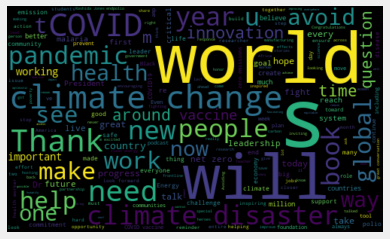

In [20]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

#Bilinear interpolation is linear interpolation in 2 dimensions, and is typically used for image scaling and for 2D finite element analysis
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Create a function to compute the negative (-1), neutral (0), and positive (+1) analysis, and add the information to a new column called Analysis. Then, show the results.

In [21]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score  0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,The journalist has created a fascinating beat ...,0.783333,0.633333,Positive
1,The persistence of countless Rotarians gives m...,0.500000,0.000000,Neutral
2,I'm almost always interested in books about Am...,0.670000,0.490000,Positive
3,"This book gave me a deeper, more nuanced appre...",0.250000,0.250000,Positive
4,If you’re looking for a good book to read this...,0.600000,0.700000,Positive
...,...,...,...,...
195,Teaching special education takes an amazing pe...,0.555357,0.426786,Positive
196,": Last month, over 1 billion students were aff...",0.066667,0.000000,Neutral
197,Our foundation is partnering with to support t...,0.250000,0.100000,Positive
198,I always look forward to meeting Washington’s ...,0.707143,0.602381,Positive


Print the positive tweets in ascending order. The most positive tweet is the #1 tweet.

In [22]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i]  'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) The journalist has created a fascinating beat for herself covering humanity’s impact on nature and our attempts to control it. Her latest book is a good reminder that we need to watch out for the unforeseen effects of our actions.

2) I'm almost always interested in books about American presidents, and I especially loved A Promised Land. It’s a fascinating look at what it’s like to steer a country through challenging times.

3) This book gave me a deeper, more nuanced appreciation for the system that is at the core of humanity’s fight against COVID-19 and everything our foundation’s Global Health program is trying to do.

4) If you’re looking for a good book to read this summer, these are some of my favorites.

5) The 7’s commitment to share 870M COVID-19 vaccine doses over the next year is welcome news - but time is not on our side. Vaccines must be delivered now to help control the pandemic everywhere and not disrupt the progress we've made.

6) : As a p

Print the negative tweets in descending order. The most negative tweet is the #1 tweet.

In [23]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i]  'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) Communities of color have been hit hard by COVID-19. One of the reasons why parts of the medical system often fail Black and brown people is because it’s not designed with them in mind. Dr. Stephaun Wallace wants to change that.

2) Dr. Stephaun Wallace has spent the last year helping make COVID-19 vaccines work for everybody. Stephaun and his colleagues at are working to reach the people who are usually left behind.

3) It’s deeply unfair that the people who contribute the least to climate change will suffer the worst from its effects:

4) : Over the past few weeks health workers in Ethiopia , Nigeria , Sudan and the Philippines were vaccinated against COVI…

5) For decades, Australian researcher Ruth Bishop led global efforts to identify and combat rotavirus. Her life is a reminder of the importance of scientific research to uncover unknown pathogens and the power of vaccines to prevent suffering and save lives.

6) : Black folks have questions about the

Plot the polarity and subjectivity as a scatter plot. It looks like the majority of the tweets are positive, as many of the points are on the right side of the polarity at value 0.00.

In [24]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

Print the percentage of positive tweets.

In [25]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis  'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

72.5

Print the percentage of negative tweets

In [26]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis  'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

10.0

Show the value counts.

In [27]:
# Show the value counts
df['Analysis'].value_counts()

Positive    145
Neutral      35
Negative     20
Name: Analysis, dtype: int64

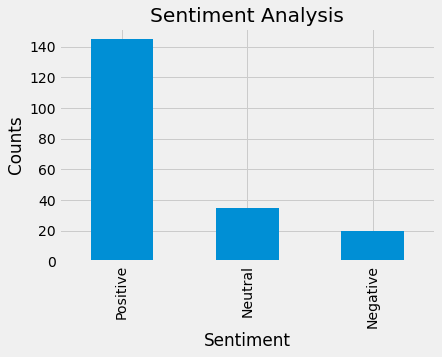

In [28]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()